# Project 2

## Data Analysis

In [135]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

df_train1 = pd.read_csv('train.csv')
df_train = df_train1.iloc[np.r_[0:3000, 1047570:1048570], 0:3]
df_test1 = pd.read_csv('test.csv')
df_test = df_test1.iloc[0:300, 0:3]
print(df_train.shape)
print(df_test.shape)

   Index  Sentiment                                               Text
0      0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1      1          0  is upset that he can't update his Facebook by ...
2      2          0  @Kenichan I dived many times for the ball. Man...
3      3          0    my whole body feels itchy and like its on fire 
4      4          0  @nationwideclass no, it's not behaving at all....
(4000, 3)
(300, 3)


array([[<AxesSubplot:title={'center':'Sentiment'}>]], dtype=object)

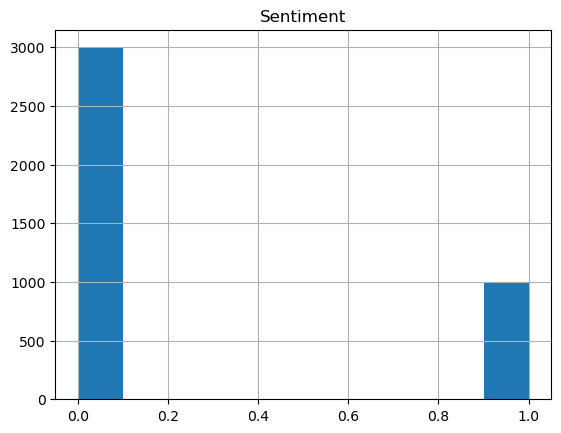

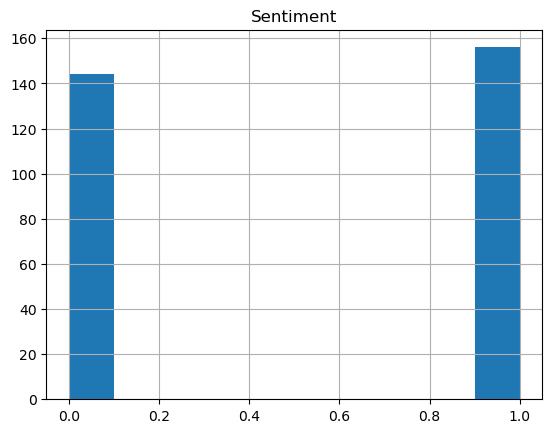

In [131]:
df_train.hist(column='Sentiment')
df_test.hist(column='Sentiment')

## Preprocessing

In [164]:
def decontrct(txt):
    txt = re.sub(r"won\'t", "will not", txt)
    txt = re.sub(r"can\'t", "can not", txt)
    txt = re.sub(r"n\'t", " not", txt)
    txt = re.sub(r"\'re", " are", txt)
    txt = re.sub(r"\'s", " is", txt)
    txt = re.sub(r"\'d", " would", txt)
    txt = re.sub(r"\'ll'", " will", txt)
    txt = re.sub(r"\'t", " not", txt)
    txt = re.sub(r"\'ve", " have", txt)
    txt = re.sub(r"\'m", " am", txt)
    return txt
    
#print(df_train[['Text']])
#problem with string conversion
print(df_train.dtypes)
#df_train['Text']=df_train['Text'].astype(str)
# i = 0
# for t in df_train['Text']:
#     print(df_train['Text'][i])
#     print(t[0])
#     df_train['Text'][i] = t[0][0].astype('|S')
#     i = i+1
#print(df_train['Text'].values.astype('|S'))
#df_train['Text'] = df_train['Text'].astype('|S')

tokens = []
temp = ""
tokens_1 = []
stage6 = []
temp6 = []
stop_words = set(stopwords.words('english'))
i = 0

print(df_train.head())

for t in df_train['Text']:
    temp = t
#     temp = re.sub('[0-9]','', temp)
#     temp = re.sub('[^A-Za-z0-9 ]+', '', temp)
#     temp = decontrct(temp)
#     print(temp)
#     temp = [w for w in temp.split() if not w in stopwords.words('english')]
#     print(temp)
    tokens.append(sent_tokenize(temp))
    i = i+1
print(tokens[0])
for snip in tokens:
    for seg in snip:
        seg = seg.lower()
        seg = re.sub('[0-9]','', seg)
        seg = decontrct(seg)
        seg = re.sub('[^A-Za-z0-9 ]+', '', seg)
        temp6.append(seg)
        #temp6.append([w for w in seg.split() if not w in stopwords.words('english')])
    stage6.append(temp6)
    temp6 = []
    
stemmer = SnowballStemmer("english")

stemmed = []
post = []
print(len(stage6))
for p in stage6:
    temp_s = []
    for s in p:
        wrds = s.split()
        #temp_s = []
        for w in wrds:
            stemmed_word = stemmer.stem(w)
            temp_s.append(stemmed_word)
        #stemmed.append(temp_s)
    post.append(" ".join(word for word in temp_s))
    stemmed = []

print(len(post))
df_train['Tokenized'] = post

i=0
for t in df_test['Text']:
    temp = t
#     temp = re.sub('[0-9]','', temp)
#     temp = re.sub('[^A-Za-z0-9 ]+', '', temp)
#     temp = decontrct(temp)
#     print(temp)
#     temp = [w for w in temp.split() if not w in stopwords.words('english')]
#     print(temp)
    tokens_1.append(sent_tokenize(temp))
    i = i+1
    
stage6 = []
temp6 = []
for snip in tokens_1:
    for seg in snip:
        seg = seg.lower()
        seg = re.sub('[0-9]','', seg)
        seg = decontrct(seg)
        seg = re.sub('[^A-Za-z0-9 ]+', '', seg)
        temp6.append(seg)
        #temp6.append([w for w in seg.split() if not w in stopwords.words('english')])
    stage6.append(temp6)
    temp6 = []
    
stemmed = []
post = []

for p in stage6:
    temp_s = []
    for s in p:
        wrds = s.split()
        #temp_s = []
        for w in wrds:
            stemmed_word = stemmer.stem(w)
            temp_s.append(stemmed_word)
        #stemmed.append(temp_s)
    post.append(" ".join(word for word in temp_s))
    stemmed = []

df_test['Tokenized'] = post




Index         int64
Sentiment     int64
Text         object
Tokenized    object
dtype: object
   Index  Sentiment                                               Text  \
0      0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1      1          0  is upset that he can't update his Facebook by ...   
2      2          0  @Kenichan I dived many times for the ball. Man...   
3      3          0    my whole body feels itchy and like its on fire    
4      4          0  @nationwideclass no, it's not behaving at all....   

                                           Tokenized  
0  switchfoot httptwitpiccomyzl awww that is a bu...  
1  is upset that he can not updat his facebook by...  
2  kenichan i dive mani time for the ball manag t...  
3       my whole bodi feel itchi and like it on fire  
4  nationwideclass no it is not behav at all i am...  
["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.", 'You shoulda got David Carr of Third Day to do it.', ';D']
4000
4

## Bag of Words

In [166]:
import sklearn
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(df_train['Tokenized'])
tf_features_test = vectorizer.transform(df_test['Tokenized'])

clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, df_train['Sentiment'])

predictions = clf.predict(tf_features_test)

In [167]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

model.train()

ValueError: You must specify either total_examples or total_words, for proper learning-rate and progress calculations. If you've just built the vocabulary using the same corpus, using the count cached in the model is sufficient: total_examples=model.corpus_count.